<a href="https://colab.research.google.com/github/Lcocks/DS050-DeepLearning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (10 pts):

From Maximum Likelihood to Cross-Entropy Loss
Learning Objectives: Connect probability theory to loss functions, understand why cross-entropy emerges naturally.

Part A: Binary Classification Loss Derivation

1. Setup: We have $n$ data points $\{ (x_i, y_i) \}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ and $y_i \in \{ 0, 1 \}$. Assume your model outputs the probability of class 1 as $p_i = p(y_i = 1 \mid x_i) = \sigma(w^T x_i + b)$ where $w \in \mathbb{R}^d$, $b \in \mathbb{R}$, and $\sigma(z)$ is the sigmoid function $\sigma(z) = 1 / (1 + e^{-z})$.
2. Derive from MLE:
    * Write the likelihood function for the dataset
    * Take the log-likelihood
    * Show that maximizing log-likelihood = minimizing binary cross-entropy
    * Bonus (5 pts): Derive the gradient and show it has the nice form: $\nabla_w = X^T(p - y)$

Part B: Extension to Multi-class

1. Softmax derivation: Extend to $K$ classes using softmax function
2. Implementation: Code both binary and multi-class cross-entropy from scratch
3. Verification: Compare your implementation with sklearn.linear_model.LogisticRegression

================================================================================\
Let's derive the binary cross-entropy loss from the principle of Maximum Likelihood Estimation (MLE).

Given $n$ data points $\{ (x_i, y_i) \}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ and $y_i \in \{ 0, 1 \}$, and our model outputs the probability of class 1 as $p_i = p(y_i = 1 \mid x_i) = \sigma(w^T x_i + b)$.

Since $y_i$ is a binary variable, the probability of observing $y_i$ given $x_i$ can be written as:
$p(y_i \mid x_i) = p_i^{y_i} (1 - p_i)^{1 - y_i}$

This is because if $y_i = 1$, the probability is $p_i^1 (1 - p_i)^0 = p_i$. If $y_i = 0$, the probability is $p_i^0 (1 - p_i)^1 = 1 - p_i$.

Assuming the data points are independent and identically distributed (i.i.d.), the likelihood function for the entire dataset is the product of the individual probabilities:
$$ L(w, b) = \prod_{i=1}^n p(y_i \mid x_i) = \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i} $$

To simplify calculations, we typically work with the log-likelihood function, which is the natural logarithm of the likelihood function. Maximizing the log-likelihood is equivalent to maximizing the likelihood because the logarithm is a monotonically increasing function.
$$ \log L(w, b) = \log \left( \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i} \right) $$
Using the property of logarithms ($\log(ab) = \log a + \log b$), we can convert the product into a sum:
$$ \log L(w, b) = \sum_{i=1}^n \log \left( p_i^{y_i} (1 - p_i)^{1 - y_i} \right) $$
Using another property of logarithms ($\log(a^b) = b \log a$), we get:
$$ \log L(w, b) = \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Our goal is to maximize the log-likelihood function with respect to the parameters $w$ and $b$.
$$ \max_{w, b} \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Minimizing a function is equivalent to maximizing the negative of that function. So, maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood:
$$ \min_{w, b} - \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$
This expression is the **binary cross-entropy loss** for the entire dataset. For a single data point, the binary cross-entropy loss is:
$$ \mathcal{L}_{BCE}(y_i, p_i) = - \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Thus, maximizing the log-likelihood of the data under our probabilistic model is equivalent to minimizing the binary cross-entropy loss between the true labels $y_i$ and the predicted probabilities $p_i$. This shows why binary cross-entropy is a natural choice for the loss function in binary classification problems when using models that output probabilities.

**Bonus: Gradient Derivation**

Let's derive the gradient of the negative log-likelihood (binary cross-entropy loss) with respect to $w$. The loss for a single data point is $\mathcal{L}_i = - [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]$. We know that $p_i = \sigma(z_i)$ where $z_i = w^T x_i + b$.

Using the chain rule, $\frac{\partial \mathcal{L}_i}{\partial w} = \frac{\partial \mathcal{L}_i}{\partial p_i} \frac{\partial p_i}{\partial z_i} \frac{\partial z_i}{\partial w}$.

1. $\frac{\partial \mathcal{L}_i}{\partial p_i}$:
   $$ \frac{\partial}{\partial p_i} [-y_i \log(p_i) - (1 - y_i) \log(1 - p_i)] = -y_i \frac{1}{p_i} - (1 - y_i) \frac{1}{1 - p_i} (-1) = -\frac{y_i}{p_i} + \frac{1 - y_i}{1 - p_i} = \frac{-y_i(1 - p_i) + p_i(1 - y_i)}{p_i(1 - p_i)} = \frac{-y_i + y_i p_i + p_i - p_i y_i}{p_i(1 - p_i)} = \frac{p_i - y_i}{p_i(1 - p_i)} $$

2. $\frac{\partial p_i}{\partial z_i}$: The derivative of the sigmoid function is $\frac{d\sigma}{dz} = \sigma(z)(1 - \sigma(z))$. So, $\frac{\partial p_i}{\partial z_i} = p_i(1 - p_i)$.

3. $\frac{\partial z_i}{\partial w}$: $z_i = w^T x_i + b$. The gradient with respect to $w$ is $x_i$. So, $\frac{\partial z_i}{\partial w} = x_i$.

Now, combining these parts:
$$ \frac{\partial \mathcal{L}_i}{\partial w} = \left( \frac{p_i - y_i}{p_i(1 - p_i)} \right) \left( p_i(1 - p_i) \right) (x_i) = (p_i - y_i) x_i $$

This is the gradient for a single data point. For the entire dataset, the total loss is the sum of individual losses $\mathcal{L} = \sum_{i=1}^n \mathcal{L}_i$. The gradient of the total loss is the sum of the individual gradients:
$$ \nabla_w \mathcal{L} = \sum_{i=1}^n (p_i - y_i) x_i $$
If we represent $X$ as the design matrix where each row is $x_i^T$, $p$ as the vector of predicted probabilities $[p_1, p_2, ..., p_n]^T$, and $y$ as the vector of true labels $[y_1, y_2, ..., y_n]^T$, this sum can be written in matrix form:
$$ \nabla_w \mathcal{L} = X^T (p - y) $$
This elegant form shows that the gradient is proportional to the transpose of the input features multiplied by the difference between the predicted probabilities and the true labels. This form is computationally efficient and intuitive, driving the weights in a direction that reduces the error $(p_i - y_i)$.

In [1]:
import math
import random
import numpy as np
import pandas as pd
import torch
from typing import Tuple, List, Generator
import matplotlib.pyplot as plt
import time

torch.manual_seed(123)

Part B:

2. Code both binary and multi-class cross-entropy from scratch

In [2]:
# Binary Cross-Entropy Loss Function ##

#np.random.seed(123)  # For reproducible results during lecture
n_points, n_features = 100, 3 
X = np.random.randn(n_points, n_features)
w = np.random.randn(n_features) # weights
b = 0.5
y = np.random.randint(0, 2, n_points)  # Binary labels
    

## noise_level is my b
def binary_cross_entropy(w, X, b, y):
    """
    Binary Cross-Entropy loss function
    """
    L = 0
    
    for i in range(len(X)):
        z_i = np.dot(w.T, X[i]) + b #for calculating logit to put in sigmoid, this is for the model p_i = σ(np.dot(w.T, X[i]) + b) 
        
        p_i = 1 / (1 + np.exp(-z_i)) #for the sigmopid function of σ(z) = 1 / (1 + e^-z)
                   
        L += (y[i] * math.log(p_i) + (1 - y[i]) * math.log(1 - p_i)) #calculating the binary-cross-entropy of each sample and summating across all rows of X.
    
    L_BCE = -L #returning negative total loss for minimization
    return L_BCE

## Testing ##
BCEloss1 = binary_cross_entropy(w, X, b, y)
print(f"Binary-Cross-Entropy loss: {BCEloss1:.6f}")

Binary-Cross-Entropy loss: 125.058303


In [3]:
## Multi-class Cross-Entropy Loss Function ##

np.random.seed(123)  # For reproducible results during lecture
n_points, n_features, K = 100, 4, 4
X = np.random.randn(n_points, n_features) # data point matrix
W = np.random.randn(n_features, K) # weights as matrix
b = np.random.randn(K) # scalar of noise_levels 
y = np.random.randint(0, K, n_points) # 1D array of labels with that can be either 0 to K  


def cross_entropy(W, X, b, y, K):
    """
    Multi-class Cross-Entropy loss function
    
    Args:
        W: weight matrix (shape: features, num_classes)
        K: int number of classes
        X: input data (shape: n_points, features)
        b: bias vector (shape: num_classes,)
        y: true labels - can be:
            - One-hot encoded (shape: n_points, num_classes)
            - Class indices (shape: n_points,) 
                
    Test 1 ###  Currently testing class indices!!! Failed! cannot use L += y[i, k] * math.log(p_i[k])  ###
    Test 2 ###  Testing one-hot encoding.
    
    Returns:
        L: Multi-class cross-entropy loss (scalar)
    """
    L = 0
    y_one_hot = np.zeros((n_points, K)) # setting up the framework 
    y_one_hot[np.arange(n_points), y] = 1 # inputting the 1's for each placement of the index provided given the current value of y.

    
    for i in range(len(X)):

        z_i = np.dot(X[i], W) + b # for calculating logit for every class with shape (K,_)
        
        exp_z = np.exp(z_i) # start applying softmax function
        
        p_i = exp_z / np.sum(exp_z)  # shape (K,_) 
        
        for k in range(K):
            
            L += y_one_hot[i, k] * math.log(p_i[k]) # calculating the cross-entropy of each sample of each class. So grabbed all the classes k for each i and calc'd loss.

    L = -L #returning negative total loss for minimization
    return L


## Testing ##
cross_loss1 = cross_entropy(W, X, b, y, K)
print(f"Multi-Class Cross-Entropy loss: {cross_loss1:.6f}")

Multi-Class Cross-Entropy loss: 286.419729


Part B:

3. Verification: Compare your implementation with sklearn.linear_model.LogisticRegression

In [5]:
from sklearn import linear_model, datasets

logreg_model = linear_model.LogisticRegression(C=1e6, random_state=123) # building the model
logreg_model.fit(X, y) # making a model fit


# Extract learned weights and bias
W_sklearn = logreg_model.coef_.T  # sklearn coef is (n_classes, n_features), we need (n_features, n_classes)
b_sklearn = logreg_model.intercept_  # bias terms
print(f"Sklearn weights: {W_sklearn}")
print(f"Sklearn bias: {b_sklearn}")

scratch_cross_entropy_loss = cross_entropy(W_sklearn, X, b_sklearn, y, K)
print(f"\nOur cross-entropy loss from the linear model: {scratch_cross_entropy_loss}")

logits = logreg_model.decision_function(X) # getting logits from sklearn



Sklearn weights: [[ 0.21661035  0.0414862   0.01722476 -0.27532131]
 [-0.20309598 -0.0087771   0.17750731  0.03436578]
 [ 0.18307943 -0.34736288  0.07182578  0.09245767]
 [ 0.18000169  0.061904   -0.25958034  0.01767464]]
Sklearn bias: [-0.08708353  0.11206366 -0.25938927  0.23440914]

Our cross-entropy loss from the linear model: 131.60434898543508


# Problem 2 (10 pts): Normal Equations vs. Gradient Descent - A Computational Study
Learning Objectives: Understand trade-offs between analytical and iterative solutions.

Analysis Tasks:

1. Complexity Analysis: Plot runtime vs. feature dimension (10 to 1000 features)
2. Accuracy Comparison: How close are the solutions? Plot error vs. iterations for GD
3. Memory Usage: When does the normal equation become impractical?
4. Conditioning: What happens when $X^TX$ is nearly singular? Add ridge regularization.
5. Report: When would you choose each method in practice?

In [ ]:
def compare_methods(n_points, n_features, noise_level=0.1): # n_features is d, n_points is num_samples = 1000, noise_level is noise

In [6]:
torch.randn(2, 1)

tensor([[-0.1115],
        [ 0.1204]])

In [41]:


    
# Generate synthetic regression data - from video https://www.youtube.com/watch?v=WOFb8EKAy7I&t=1s
def generate_synthetic_data(
    weights: torch.tensor,
    bias: float,
    num_samples: int,
    noise_std: float = 0.01
    ) -> Tuple[torch.Tensor, torch.Tensor]: #This -> means returns and the type that should be returned.

    """
    Model: y = X @ w + b + ε, with ε ~ N(Θ, noise_std^2)
    Args:
        weights: (d,_) true weight vector
        bias: scaler true intercept
        num_samples: number of samples n
        noise_std: standard deviation of additive Gaussian noise

    Returns:
        X: (n, d) feature matrix
        y: (n, 1) target vector
    """

    d = weights.shape[0]
    X = torch.randn(num_samples, d)
    noise = torch.randn(num_samples, 1) * noise_std
    y = X @ weights.view(-1, 1) + bias + noise
    return X, y
    

class LinearRegressionScratch:
    # Linear regression "neural network" with parameters θ = (w, b),
    # trained by vanilla gradient descent with manually derived gradients.

    # Model:
    # y_hat = X @ w + b

    # Loss (MSE):
    # L = (1/n) * Σ_i (y_hat_i - y_i)^2

    # Gradients:
    # ∂L/∂w = (2/n) * X^T (y_hat - y)
    # ∂L/∂b = (2/n) * Σ_i (y_hat_i - y_i)

    def __init__(self, input_size: int, learning_rate: float = 0.01):
        
        self.w = torch.randn(input_size, 1) * 0.01
        self.b = torch.randn(1)
        self.lr = learning_rate
        self.input_size = input_size

        # No autograd - we will compute gradients manually
        self.w.requires_grad = False
        self.b.requires_grad = False
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """
        Computes predictions: y_hat = X @ w + b
        """
        return X @ self.w + self.b
    
    def mse_loss(self, y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        """
        Computes the Mean Squared Error (MSE) loss.
        """
        return ((y_hat - y)**2).mean()
    
    ##  Added this to use X, y and still get mse from global  ## 
    def compute_mse_loss(self, X, y):
        y_pred = self.forward(X)  # Calculate prediction
        return torch.mean((y_pred - y)**2)    # Return loss directly

    def compute_gradients(self, X: torch.Tensor, y_hat: torch.Tensor, y: torch.Tensor) -> Tuple[torch.Tensor, torch]:
        """
        Compute gradients of loss with respect to parameters w and b
        Derive ∂L/∂w and ∂L/∂b by calculus.

        With L = (1/n) Σ (y_hat - y)^2, the derivatives are:
        ∂L/∂w = (2/n) X^T (y_hat - y)
        ∂L/∂b = (2/n) Σ (y_hat - y)
        """
        n = X.shape[0]
        error = y_hat - y
        dw = (2.0/n) * X.T @ error
        db = (2.0/n) * error.sum() # gradient of bias is basically average error, so moving the bias to 0
        return dw, db   
    
    def step(self, X: torch.Tensor, y: torch.Tensor) -> float:
        """
        One gradient descent update:
            1) forward
            2) loss
            3) gradients (manual)
            4) parameter update
        """
        # 1 forward
        y_hat = self.forward(X)
        # 2 loss
        loss = self.mse_loss(y_hat, y)
        # 3 gradients
        dw, db = self.compute_gradients(X, y_hat, y)
        # update
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return loss.item()
   
        

In [42]:
from collections.abc import Iterator

##  Mini-batching & Training Loop  ##
def create_mini_batches(
    X: torch.Tensor,
    y: torch.Tensor,
    batch_size: int = 32,
    shuffle: bool = True
) -> Iterator[Tuple[torch.Tensor, torch.Tensor]]:
    n = X.shape[0]
    if shuffle:
        idx = torch.randperm(n)
    else:
        idx = torch.arange(n)
    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        b = idx[start:end]
        yield X[b], y[b]


In [43]:
from re import X
##  Training the model  ##
def train_model(
    model: LinearRegressionScratch,
    X: torch.Tensor,
    y: torch.Tensor,
    num_epochs: int = 50,
    batch_size: int = 32,
    verbose: bool = True
) -> List[float]:
    """
    Basic mini batch GD training loop.
    We report avg loss per epoch.
    """
    if verbose:
            print("/n==== Training Model ====")
    total_loss = 0.0
    epoch_avgs: List[float] = []
    for epoch in range(num_epochs):
        num_batches = 0.0
        epoch_loss = 0.0
        for X_batch, y_batch in create_mini_batches(X, y, batch_size):
            loss = model.step(X_batch, y_batch)
            total_loss += loss
            num_batches += 1
        epoch_loss = total_loss / max(num_batches, 1)
        epoch_avgs.append(epoch_loss)
        if verbose:
            w, b = model.w, model.b
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | w={[f'{wi:.3f}' for wi in w]} | b = {b: .3f}")
    return epoch_avgs

In [44]:
##  Testing  ##

# 1) Ground truth pars and data
TRUE_W = torch.rand(10).reshape(-1, 1) # here we have 2 dimensions
TRUE_B = 4.2
N = 100

X, y = generate_synthetic_data(TRUE_W, TRUE_B, N)
print(f"[Data] True w={TRUE_W.tolist()}, b={TRUE_B:.3f}")

# 2) Initialize the model
model = LinearRegressionScratch(input_size=10)

# 3) Train
losses = train_model(model, X, y, num_epochs=100, verbose=False)
w_learned, b_learned = model.w, model.b
print(f"[Model] Learned params: w={w_learned.tolist()}, b={b_learned.item():.3f}")

[Data] True w=[[0.29044950008392334], [0.5593220591545105], [0.38406169414520264], [0.2044498324394226], [0.025076627731323242], [0.4780524969100952], [0.1957935094833374], [0.8467287421226501], [0.8912301063537598], [0.41954493522644043]], b=4.200
[Model] Learned params: w=[[0.2996874451637268], [0.5645212531089783], [0.3905162513256073], [0.1882598102092743], [0.027697401121258736], [0.467103511095047], [0.20247218012809753], [0.8501148819923401], [0.8945286870002747], [0.4245956838130951]], b=4.187


In [59]:
##  Analytical solution (Normal Equations)  ##
print("\n2. Analytical solution...")

start_time = time.time()

# Add bias column to X (augment the matrix)
ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
X_augmented = torch.cat([X, ones_column], dim=1)
print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

# Normal equations: w = (X^T X)^(-1) X^T y
XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
XTy = X_augmented.T @ y
w_analytical = torch.linalg.solve(XTX, XTy)  # More stable than inverse

w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 10x1 length tensor.
analytic_loss_optimal = model.compute_mse_loss(X, y)

analytical_time = time.time() - start_time

print(f"Analytical solution: w={w_opt.tolist()}, b={b_opt:.4f}") # to show tensor make it a list
print(f"Optimal loss: {analytic_loss_optimal:.4f}")


##  Iterative solution (gradient descent)  ##
print("\n3. Gradient descent...")

start_time = time.time()


w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)


gd_time = time.time() - start_time
    
print(f"\nGradient descent result: w={w_gd.tolist()}, b={b_gd.item():.4f}")

# Compare solutions and convergence
print(f"Difference of Gradient Descent from Analytical: Δw={w_gd-w_opt}, Δb={abs(b_gd.item()-b_opt):.6f}")

# Time both approaches
    ##  Timing setup in the comparison portion, timing printed here  ##
print(f"Analytical(Normal) Time: {analytical_time:.6f} seconds")
print(f"Gradient Descent(Iterative) Time: {gd_time:.6f} seconds")


2. Analytical solution...
X shape: torch.Size([100, 10]) -> X_augmented shape: torch.Size([100, 11])
Analytical solution: w=[[0.2885613441467285], [0.5581826567649841], [0.38367295265197754], [0.20408132672309875], [0.025549769401550293], [0.4775561988353729], [0.19512273371219635], [0.8473958969116211], [0.8923746347427368], [0.4197760820388794]], b=4.1993
Optimal loss: 0.0004

3. Gradient descent...

Gradient descent result: w=[[0.29929375648498535], [0.5642908811569214], [0.39026957750320435], [0.1890319138765335], [0.02759561501443386], [0.4676114022731781], [0.2021772265434265], [0.8501036763191223], [0.894440770149231], [0.42440250515937805]], b=4.1879
Difference of Gradient Descent from Analytical: Δw=tensor([[ 0.0107],
        [ 0.0061],
        [ 0.0066],
        [-0.0150],
        [ 0.0020],
        [-0.0099],
        [ 0.0071],
        [ 0.0027],
        [ 0.0021],
        [ 0.0046]]), Δb=0.011333
Analytical(Normal) Time: 0.001353 seconds
Gradient Descent(Iterative) Time: 0

In [60]:
##  Testing 2  ##

# 1) Ground truth pars and data
TRUE_W = torch.rand(100).reshape(-1, 1) # here we have 2 dimensions
TRUE_B = 4.2
N = 100

X, y = generate_synthetic_data(TRUE_W, TRUE_B, N)
print(f"[Data] True w={TRUE_W.tolist()}, b={TRUE_B:.3f}")

# 2) Initialize the model
model = LinearRegressionScratch(input_size=100)

# 3) Train
losses = train_model(model, X, y, num_epochs=100, verbose=False)
w_learned, b_learned = model.w, model.b
print(f"[Model] Learned params: w={w_learned.tolist()}, b={b_learned.item():.3f}")

##  Analytical solution (Normal Equations)  ##
print("\n2. Analytical solution...")

start_time = time.time()

# Add bias column to X (augment the matrix)
ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
X_augmented = torch.cat([X, ones_column], dim=1)
print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

# Normal equations: w = (X^T X)^(-1) X^T y
XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
XTy = X_augmented.T @ y
w_analytical = torch.linalg.solve(XTX, XTy)  # More stable than inverse

w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 10x1 length tensor.
analytic_loss_optimal = model.compute_mse_loss(X, y)

analytical_time = time.time() - start_time

print(f"Analytical solution: w={w_opt.tolist()}, b={b_opt:.4f}") # to show tensor make it a list
print(f"Optimal loss: {analytic_loss_optimal:.4f}")


##  Iterative solution (gradient descent)  ##
print("\n3. Gradient descent...")

start_time = time.time()


w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)


gd_time = time.time() - start_time
    
print(f"\nGradient descent result: w={w_gd.tolist()}, b={b_gd.item():.4f}")

# Compare solutions and convergence
print(f"Difference of Gradient Descent from Analytical: Δw={w_gd-w_opt}, Δb={abs(b_gd.item()-b_opt):.6f}")

# Time both approaches
    ##  Timing setup in the comparison portion, timing printed here  ##
print(f"Analytical(Normal) Time: {analytical_time:.6f} seconds")
print(f"Gradient Descent(Iterative) Time: {gd_time:.6f} seconds")

[Data] True w=[[0.7441354393959045], [0.054113149642944336], [0.1547689437866211], [0.7791526913642883], [0.38427531719207764], [0.9896624088287354], [0.9186819195747375], [0.29841381311416626], [0.9562726616859436], [0.48421043157577515], [0.5419871807098389], [0.24367845058441162], [0.4409177303314209], [0.7986906170845032], [0.8778460025787354], [0.09786063432693481], [0.8654876351356506], [0.7407096028327942], [0.4664528965950012], [0.5897785425186157], [0.8027569651603699], [0.8979907631874084], [0.48103922605514526], [0.9589821696281433], [0.4925660490989685], [0.39514386653900146], [0.789908766746521], [0.05588775873184204], [0.7109460234642029], [0.036553919315338135], [0.0861133337020874], [0.8983678221702576], [0.08828234672546387], [0.26970958709716797], [0.7772068381309509], [0.24374842643737793], [0.4795992970466614], [0.32398712635040283], [0.9536418318748474], [0.984103798866272], [0.998329758644104], [0.7033678293228149], [0.02704530954360962], [0.38615840673446655], [0

In [51]:
## My iterative solution is finding the GD and my analytical solution is using linear regression.

def compare_methods(n_points, n_features, noise_level=0.1):
    
    
    # Generate synthetic regression data
        # "What should our true relationship be?"
    print("\n1. Generating data...")
    np.random.seed(123)
    X = np.linspace(0, 10, n_points)

        # True relationship: y = 2x + 1 + noise
    true_w, true_b = 2.0, 1.0
    noise_level = 2.0 
    y = true_w * X + true_b + np.random.randn(n_points) * noise_level

    print(f"True parameters: w={true_w}, b={true_b}")

        #Define loss function - here using MSE
             # "Recall, why squared error? What are alternatives?"
    def compute_MSE_loss(w, b, X, y):
        """
        Mean Squared Error loss function
        """
        predictions = w * X + b
        errors = y - predictions
        mse = np.mean(errors**2)
        return mse
    
    
    
    # Implement both methods
        ##  Analytical solution (Normal Equations)  ##
    print("\n2. Analytical solution...")
    
    start_time = time.time()
    
    X_augmented = np.column_stack([X, np.ones(len(X))]) # Add bias column to X (augment the matrix)
    print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

        # Normal equations: w = (X^T X)^(-1) X^T y
    XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
    XTy = X_augmented.T @ y
    w_analytical = np.linalg.solve(XTX, XTy)  # More stable than inverse

    w_opt, b_opt = w_analytical[0], w_analytical[1]
    analytic_loss_optimal = compute_MSE_loss(w_opt, b_opt, X, y)

    print(f"Analytical solution: w={w_opt:.3f}, b={b_opt:.3f}")
    print(f"Optimal loss: {analytic_loss_optimal:.3f}")

    analytical_time = time.time() - start_time
    
        ##  Iterative solution (gradient descent)  ##
    print("\n3. Gradient descent...")
    
    def gradient_descent(X, y, learning_rate=0.01, max_epochs=1000, verbose=True):
        """
        Gradient descent for linear regression
        """
            # Initialize parameters
        w, b = 0.0, 0.0  # Start from zero (ask: "Why not random?")

            # Storage for plotting convergence
        loss_history = []
        w_history, b_history = [], []

        for epoch in range(max_epochs):
                # Forward pass: compute predictions
            predictions = w * X + b

                # Compute loss
            current_MSE_loss = compute_MSE_loss(w, b, X, y) # Using MSE from above 
            loss_history.append(current_MSE_loss)
            w_history.append(w)
            b_history.append(b)

                # Backward pass: compute gradients
            errors = predictions - y
            dw = np.mean(errors * X)  # Derivative w.r.t. w
            db = np.mean(errors)      # Derivative w.r.t. b

                # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db

                # Print progress
            if verbose and epoch % 200 == 0:
                print(f"Epoch {epoch:4d}: Loss = {current_MSE_loss:.4f}, w = {w:.3f}, b = {b:.3f}")

        return w, b, loss_history, w_history, b_history

    # Run gradient descent
    learning_rate = 0.01
    
    start_time = time.time()
    
    w_gd, b_gd, losses, w_hist, b_hist = gradient_descent(X, y, learning_rate)

    gd_time = time.time() - start_time
    
    print(f"\nGradient descent result: w={w_gd:.3f}, b={b_gd:.3f}")
    
    
    
    # Time both approaches
        ##  Timing setup in the comparison portion, timing printed here  ##
    print(f"Analytical(Normal) Time: {analytical_time:.6f} seconds")
    print(f"Gradient Descent(Iterative) Time: {gd_time:.6f} seconds")
    
    
    
    # Compare solutions and convergence
    print(f"Difference of Gradient Descent from Analytical: Δw={abs(w_gd-w_opt):.6f}, Δb={abs(b_gd-b_opt):.6f}")
    
    return {
    'normal_solution': {
        'parameters': (w_opt, b_opt),
        'time': analytical_time,
        'mse': analytic_loss_optimal
        },
    'gradient_descent': {
        'parameters': (w_gd, b_gd),
        'time': gd_time,
        'mse': losses[-1],
        'loss_history': losses
        }
    }

In [52]:
solutions_10feat = compare_methods(n_points = 100, n_features = 10, noise_level = 0.1)
#solutions_100feat = compare_methods(n_points = 100, n_features = 100, noise_level = 0.1)





1. Generating data...
True parameters: w=2.0, b=1.0

2. Analytical solution...
X shape: (50,) -> X_augmented shape: (50, 2)
Analytical solution: w=2.076, b=0.645
Optimal loss: 5.610

3. Gradient descent...
Epoch    0: Loss = 164.5876, w = 0.731, b = 0.110
Epoch  200: Loss = 5.6203, w = 2.106, b = 0.448
Epoch  400: Loss = 5.6139, w = 2.094, b = 0.526
Epoch  600: Loss = 5.6116, w = 2.087, b = 0.573
Epoch  800: Loss = 5.6108, w = 2.083, b = 0.602

Gradient descent result: w=2.080, b=0.619
Analytical(Normal) Time: 0.000162 seconds
Gradient Descent(Iterative) Time: 0.017723 seconds
Difference of Gradient Descent from Analytical: Δw=0.003924, Δb=0.026228


In [ ]:
#testing branch feature commit

# Problem 3 (10 pts): SGD Exploration - Escaping Local Minima (Extended)
Learning Objectives: Understand SGD's stochastic nature and hyperparameter effects.

Part A: In the Google Colab code for Module 1 ([link](https://colab.research.google.com/drive/1dXLaMnIOQtcBqCZ9LnPiSEpVYmtviRxB?usp=sharing)), we code the Two-Hole Landscape, now extend it:

In [ ]:
## Part B: Systematic Hyperparameter Study

def sgd_parameter_study():
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    batch_sizes = [1, 4, 16, 64]  # Simulate different batch sizes
    noise_scales = [0.1, 0.5, 1.0, 2.0]

    # For each combination:
    # - Run 20 trials from the same starting point
    # - Record: final loss, success rate (reaching global min), convergence time
    # - Create heatmaps showing success rate vs. (lr, batch_size)

In [ ]:
## Part C: Design Your Own Landscape
## Create a more complex loss function with 3+ minima:

def multi_modal_loss(w):
    # Design a function with multiple local minima of different qualities
    # Include saddle points for extra challenge
    pass

Part D: Analysis Questions

1. What batch size gives the best exploration vs. exploitation trade-off?
2. How does the "escape probability" change with learning rate?
3. Create an "optimization phase diagram" showing which parameter combinations succeed.

# Problem 4 (10 pts): The Perceptron Problem - Understanding Linear Separability Limitations

## What is a Perceptron?

Based on our lecture, a **perceptron** is a binary classifier that makes predictions using a linear decision boundary. It consists of:

- **Inputs**: A feature vector $x \in \mathbb{R}^d$
- **Weights**: A weight vector $w \in \mathbb{R}^d$
- **Bias**: A scalar bias term $b \in \mathbb{R}$
- **Activation**: A step function (threshold function)

The perceptron computes:
$$ f(x) = \text{step} (w^T x + b) $$

Where the step function outputs:
$$ \text{step}(w^T x + b) = \begin{cases}
1 & \text{if} \quad w^T x + b \geq 0 \\
0 & \text{if} \quad w^T x + b < 0
\end{cases} $$

The decision boundary is the hyperplane defined by $w^T x + b = 0$, which divides the input space into two regions.

## The Fundamental Problem

The perceptron suffers from a **critical limitation**: it can only solve **linearly separable** problems. This means it can only correctly classify data where the two classes can be perfectly separated by a single straight line (in 2D) or hyperplane (in higher dimensions).

### The XOR Problem: A Classic Example

The most famous demonstration of this limitation is the **XOR (Exclusive OR) problem**:

| x₁ | x₂ | XOR Output |
|----|----|------------|
| 0  | 0  | 0          |
| 0  | 1  | 1          |
| 1  | 0  | 1          |
| 1  | 1  | 0          |

If you plot these four points:
- Points (0,1) and (1,0) should be classified as class 1 (XOR = 1)
- Points (0,0) and (1,1) should be classified as class 0 (XOR = 0)

**No single straight line can separate these classes!** The pattern requires a non-linear decision boundary.

## Why This Matters

This limitation reveals why:

1. **Single perceptrons are insufficient** for many real-world problems
2. **We need non-linearity** in our models (like ReLU activation functions)
3. **Multiple layers are essential** to create complex, non-linear decision boundaries
4. **The XOR problem motivated** the development of multi-layer neural networks

As we learned in our previous lecture, when we combine multiple ReLU neurons and stack them in layers, we can create complex, bent decision boundaries that can solve non-linearly separable problems like XOR.

This historical limitation of the perceptron was so significant that it contributed to the "AI winter" of the 1970s, until researchers developed multi-layer networks with backpropagation in the 1980s.


To Do: Fill in the blanks marked by **TODO**.

Learning Objectives

1. Implement a perceptron from scratch to understand its mechanics
2. Demonstrate why linear models fail on non-linearly separable data
3. Visualize decision boundaries and their limitations
4. Show how adding non-linear features can solve the problem

XOR Dataset - The Classic Non-Linearly Separable Problem:
Inputs (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs (y):
[0 1 1 0]

Notice: Points (0,1) and (1,0) have output 1, while (0,0) and (1,1) have output 0
No single straight line can separate these two classes!


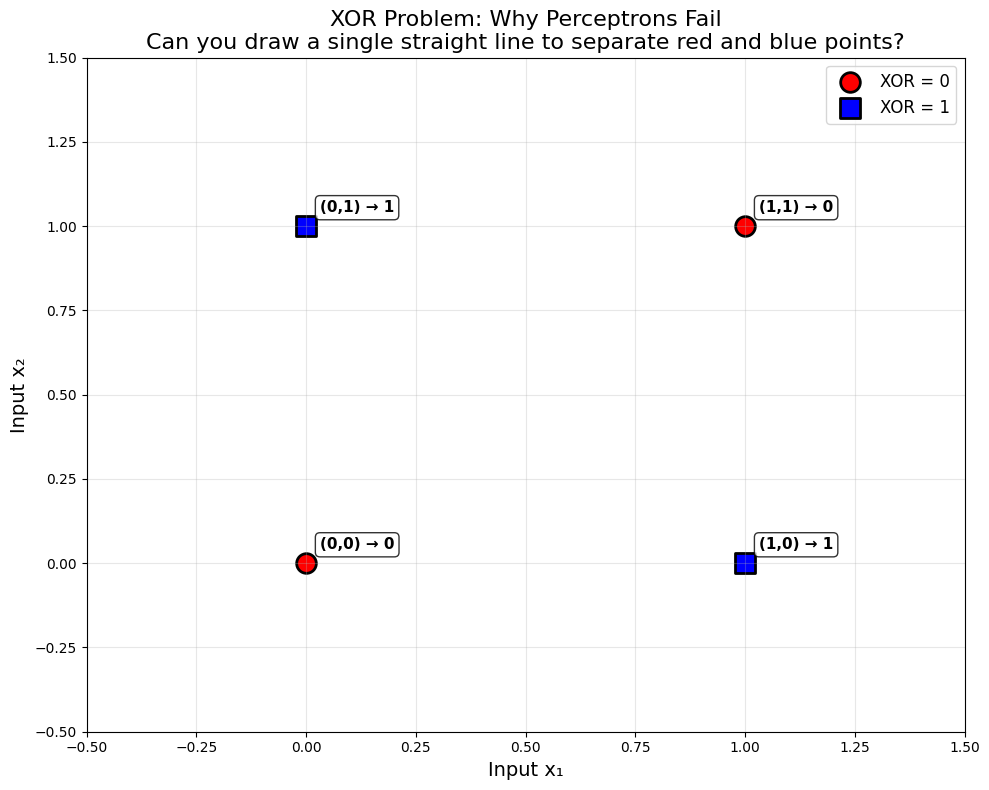

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Creating the XOR Dataset

def create_xor_dataset():
    """
    Create the classic XOR dataset that demonstrates linear non-separability.
    This is the problem that historically showed perceptron limitations.
    """
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])

    return X, y

# Create the XOR dataset
X_xor, y_xor = create_xor_dataset()
print("XOR Dataset - The Classic Non-Linearly Separable Problem:")
print("Inputs (X):")
print(X_xor)
print("Outputs (y):")
print(y_xor)
print("\nNotice: Points (0,1) and (1,0) have output 1, while (0,0) and (1,1) have output 0")
print("No single straight line can separate these two classes!")


## Part 2: Visualizing the Non-Linear Separability Problem

def plot_xor_data(X, y):
    """
    Visualize the XOR problem to show why it's non-linearly separable.
    This plot clearly shows the geometric impossibility for a perceptron.
    """
    plt.figure(figsize=(10, 8))
    class_0_mask = (y == 0)
    class_1_mask = (y == 1)
    plt.scatter(X[class_0_mask, 0], X[class_0_mask, 1], c='red', marker='o', s=200, label='XOR = 0', edgecolor='black', linewidth=2)
    plt.scatter(X[class_1_mask, 0], X[class_1_mask, 1], c='blue', marker='s', s=200, label='XOR = 1', edgecolor='black', linewidth=2)

    plt.xlabel('Input x₁', fontsize=14)
    plt.ylabel('Input x₂', fontsize=14)
    plt.title('XOR Problem: Why Perceptrons Fail\nCan you draw a single straight line to separate red and blue points?', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # Add text annotations for each point showing the XOR computation
    for i in range(len(X)):
        plt.annotate(f'({X[i,0]},{X[i,1]}) → {y[i]}',
                    (X[i,0], X[i,1]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

plot_xor_data(X_xor, y_xor)

In [ ]:
## Part 3: Implementing a Perceptron from Scratch

class SimplePerceptron:
    """
    A simple perceptron implementation to demonstrate the linear threshold mechanism.
    This follows the classic perceptron learning algorithm from our lectures.
    """
    def __init__(self, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.training_errors = []

    def _activation_function(self, z):
        """Step function: returns 1 if z >= 0, else 0"""
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the perceptron using the classic perceptron learning rule:
        w = w + η(target - prediction) * input
        """
        n_points, n_features = X.shape

        # TODO: Initialize weights randomly and bias to zero
        self.weights = ?
        self.bias = ?

        # Training loop - implement the perceptron learning algorithm
        for epoch in range(self.max_epochs):
            # Number of wrong predictions in current epoch
            errors = 0

            for i in range(n_points):
                # TODO: Compute the linear combination (net input)
                linear_output = ?

                # Apply step function to get prediction
                prediction = self._activation_function(linear_output)

                # TODO: Calculate the error and update rule
                error = ?

                # Only update weights if there's an error (classic perceptron rule)
                if error != 0:
                    errors += 1

                    # TODO: Apply perceptron update rule
                    self.weights += ?
                    self.bias += ?

            self.training_errors.append(errors)

            # If no errors in this epoch, we've converged (for linearly separable data)
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs!")
                break
        else:
            print(f"Did not converge after {self.max_epochs} epochs - likely not linearly separable!")

    def predict(self, X):
        """Make predictions using the learned decision boundary"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def get_decision_boundary_params(self):
        """
        Get parameters for plotting the decision boundary line.
        Decision boundary: w₁x₁ + w₂x₂ + b = 0
        Rearranged as: x₂ = -(w₁x₁ + b) / w₂
        """
        if len(self.weights) == 2 and self.weights[1] != 0:
            slope = -self.weights[0] / self.weights[1]
            intercept = -self.bias / self.weights[1]
            return slope, intercept
        return None, None

In [ ]:
from sklearn.metrics import accuracy_score

## Part 4: Training the Perceptron on XOR and Observing the Failure

print("Training a perceptron on the XOR problem...")
print("Expected result: The perceptron will fail to learn the correct pattern!")
print("-" * 60)

# TODO: Create and train the perceptron
perceptron = ?
perceptron.fit(?, ?)

# Make predictions and evaluate
predictions = ?
accuracy = ?

print(f"\nFinal Results:")
print(f"Accuracy: {accuracy:.2f} (Perfect would be 1.00)")
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias:.3f}")

print("\nPredictions vs True values:")
print("Input  | True | Predicted | Correct?")
print("-" * 36)
for i in range(len(X_xor)):
    correct = "✓" if predictions[i] == y_xor[i] else "✗"
    print(f"{X_xor[i]}  |  {y_xor[i]}   |     {predictions[i]}     |    {correct}")

In [ ]:
## Part 5: Visualizing the Decision Boundary and the Failure

def plot_perceptron_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary"):
    """
    Plot the data points and the linear decision boundary learned by the perceptron.
    This visualization clearly shows why the linear boundary fails on XOR.
    """
    plt.figure(figsize=(10, 8))

    # Plot the data points
    class_0_mask = (y == 0)
    class_1_mask = (y == 1)
    plt.scatter(X[class_0_mask, 0], X[class_0_mask, 1], c='red', marker='o', s=200,
                label='XOR = 0', edgecolor='black', linewidth=2)
    plt.scatter(X[class_1_mask, 0], X[class_1_mask, 1], c='blue', marker='s', s=200,
                label='XOR = 1', edgecolor='black', linewidth=2)

    # TODO: Plot the decision boundary
    slope, intercept = ?

    if slope is not None:
        x_line = np.linspace(-0.5, 1.5, 100)
        y_line = slope * x_line + intercept
        plt.plot(x_line, y_line, 'k--', linewidth=3, label='Decision Boundary', alpha=0.8)

        # Show which side is which
        plt.fill_between(x_line, y_line, 2, alpha=0.1, color='blue', label='Predicted: Class 1')
        plt.fill_between(x_line, y_line, -1, alpha=0.1, color='red', label='Predicted: Class 0')

    # Show predictions as text annotations
    predictions = perceptron.predict(X)
    for i in range(len(X)):
        color = 'green' if predictions[i] == y[i] else 'red'
        marker = '✓' if predictions[i] == y[i] else '✗'
        plt.annotate(f'Pred: {predictions[i]} {marker}',
                    (X[i,0], X[i,1]),
                    xytext=(5, -25), textcoords='offset points',
                    color=color, fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    plt.xlabel('Input x₁', fontsize=14)
    plt.ylabel('Input x₂', fontsize=14)
    plt.title(title + '\nNotice: The straight line cannot separate the classes correctly!', fontsize=16)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.tight_layout()
    plt.show()

plot_perceptron_decision_boundary(X_xor, y_xor, perceptron,
                                 "Perceptron Failure on XOR Problem")

In [ ]:
## Part 6: The Solution - Non-Linear Feature Engineering

def create_nonlinear_features(X):
    """
    Transform the XOR problem into a linearly separable one by adding non-linear features.
    This is the key insight: we need to transform the problem space!
    """
    # TODO: Add non-linear features to make XOR linearly separable
    # One approach: add x₁ XOR x₂ directly (but that's cheating!)
    # Another approach: add the product x₁ * x₂ as a new feature
    # Let's add the product feature: X_enhanced = [x₁, x₂, x₁*x₂]

    X_enhanced = np.column_stack([X, ?])

    return X_enhanced

# Create enhanced features
X_enhanced = create_nonlinear_features(X_xor)

print("Original XOR problem:")
print("Inputs (x₁, x₂):")
print(X_xor)
print("\nEnhanced with non-linear features:")
print("Inputs (x₁, x₂, x₁*x₂):")
print(X_enhanced)
print("\nOutputs:", y_xor)

print("\nKey insight: In the enhanced space, the problem becomes linearly separable!")
print("Notice how the x₁*x₂ feature helps distinguish the classes:")
for i in range(len(X_enhanced)):
    print(f"Point {X_enhanced[i]} → class {y_xor[i]}")

In [ ]:
from sklearn.linear_model import Perceptron

# Train a perceptron on the enhanced features
print("\nTraining perceptron on enhanced features...")
enhanced_perceptron = Perceptron(random_state=42, max_iter=1000)
enhanced_perceptron.fit(X_enhanced, y_xor)

enhanced_predictions = enhanced_perceptron.predict(X_enhanced)
enhanced_accuracy = accuracy_score(y_xor, enhanced_predictions)

print(f"\nResults with non-linear features:")
print(f"Accuracy: {enhanced_accuracy:.2f} (Perfect!)")
print(f"Weights: {enhanced_perceptron.coef_[0]}")
print(f"Bias: {enhanced_perceptron.intercept_[0]:.3f}")

print("\nPredictions vs True values:")
print("Enhanced Input | True | Predicted | Correct?")
print("-" * 44)
for i in range(len(X_enhanced)):
    correct = "✓" if enhanced_predictions[i] == y_xor[i] else "✗"
    print(f"{X_enhanced[i]}        |  {y_xor[i]}   |     {enhanced_predictions[i]}     |    {correct}")

print(f"\nConclusion: By adding non-linear features, we made XOR linearly separable!")
print("This is exactly what hidden layers in neural networks do automatically!")